<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/ku_API_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 41 kB/s 
     |████████████████████████████████| 199 kB 52.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=02a8c1a60eaee9eda9a11b2777d7a6efcc88792d75026d2a99831ed212bfac5f
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


solution 1) *********************

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
schema = "hotel string ,is_canceled int,	lead_time int,	arrival_date_year string,	arrival_date_month string,	arrival_date_week_number int,	arrival_date_day_of_month int,	stays_in_weekend_nights int,	stays_in_week_nights int,	adults int,	children string,	babies int,	meal string,	country string,	market_segment string,	distribution_channel string,	is_repeated_guest int,	previous_cancellations int ,	previous_bookings_not_canceled int,	reserved_room_type string,	assigned_room_type string,	booking_changes int,	deposit_type string,	agent int,	company int,	days_in_waiting_list int,	customer_type string,	adr int,	required_car_parking_spaces int,	total_of_special_requests int,	reservation_status string,	reservation_status_date string"

In [5]:
df=spark.read.csv("/content/hotel_bookings.csv", header=True, schema=schema)

In [6]:
df.createOrReplaceTempView("dfhotel")

In [8]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_parking_spaces|total_

solution 2) **********************

In [9]:
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: string (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullabl

In [10]:
df.count()

119390

In [11]:
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [12]:
len(df.columns)

32

In [13]:
spark.sql("select * from dfhotel").show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_parking_spaces|total_

hotel string ,is_canceled int,	lead_time int,	arrival_date_year string,	arrival_date_month string,	arrival_date_week_number int,	arrival_date_day_of_month int,	stays_in_weekend_nights int,	stays_in_week_nights int,	adults int,	children string,	babies int,	meal string,	country string,	market_segment string,	distribution_channel string,	is_repeated_guest int,	previous_cancellations int ,	previous_bookings_not_canceled int,	reserved_room_type string,	assigned_room_type string,	booking_changes int,	deposit_type string,	agent int,	company int,	days_in_waiting_list int,	customer_type string,	adr int,	required_car_parking_spaces int,	total_of_special_requests int,	reservation_status string,	reservation_status_date string

In [14]:
df[  'arrival_date_year', 'arrival_date_month',  'arrival_date_day_of_month'].show(5)

+-----------------+------------------+-------------------------+
|arrival_date_year|arrival_date_month|arrival_date_day_of_month|
+-----------------+------------------+-------------------------+
|             2015|              July|                        1|
|             2015|              July|                        1|
|             2015|              July|                        1|
|             2015|              July|                        1|
|             2015|              July|                        1|
+-----------------+------------------+-------------------------+
only showing top 5 rows



solution 3) **************

In [15]:
df.filter(df.lead_time>365).count()

3148

solution 4) ****


In [16]:
 df.filter( (df.stays_in_weekend_nights >0) & (df.stays_in_week_nights >0) ).count()

60462

solution 5) ********

In [17]:
import pyspark.sql.functions as F

In [18]:
df.select ( F.when (df.children =='NA', '0' ) .otherwise (df.children)).count()

119390

solution 6) *********

In [19]:
df.agg(F.mean(df.children)).show()

+-------------------+
|      avg(children)|
+-------------------+
|0.10388990333874994|
+-------------------+



solution 7) ******

In [20]:
df.select('country').distinct().collect()

[Row(country='POL'),
 Row(country='LVA'),
 Row(country='ZMB'),
 Row(country='JAM'),
 Row(country='BRA'),
 Row(country='ARM'),
 Row(country='MOZ'),
 Row(country='CUB'),
 Row(country='JOR'),
 Row(country='FRA'),
 Row(country='URY'),
 Row(country='GIB'),
 Row(country='ETH'),
 Row(country='CN'),
 Row(country='ITA'),
 Row(country='UKR'),
 Row(country='CMR'),
 Row(country='GHA'),
 Row(country='SEN'),
 Row(country='COM'),
 Row(country='HRV'),
 Row(country='QAT'),
 Row(country='BHS'),
 Row(country='GBR'),
 Row(country='ARE'),
 Row(country='FRO'),
 Row(country='CRI'),
 Row(country='TJK'),
 Row(country='NPL'),
 Row(country='UGA'),
 Row(country='AZE'),
 Row(country='AUS'),
 Row(country='MLT'),
 Row(country='KNA'),
 Row(country='MEX'),
 Row(country='BGD'),
 Row(country='BLR'),
 Row(country='SVK'),
 Row(country='SYC'),
 Row(country='STP'),
 Row(country='HUN'),
 Row(country='NZL'),
 Row(country='THA'),
 Row(country='DJI'),
 Row(country='NOR'),
 Row(country='IRQ'),
 Row(country='VEN'),
 Row(country='

solution 8) ******

In [21]:
df.groupby('hotel').count().show()

+------------+-----+
|       hotel|count|
+------------+-----+
|  City Hotel|79330|
|Resort Hotel|40060|
+------------+-----+



solution 9) **

In [22]:
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: string (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullabl

In [23]:
df.groupby('country').count().sort('count',ascending=False).show(5)

+-------+-----+
|country|count|
+-------+-----+
|    PRT|48590|
|    GBR|12129|
|    FRA|10415|
|    ESP| 8568|
|    DEU| 7287|
+-------+-----+
only showing top 5 rows



solution 10) ***

In [24]:
df.groupby('customer_type').agg(F.mean(df.lead_time)).show()

+---------------+------------------+
|  customer_type|    avg(lead_time)|
+---------------+------------------+
|      Transient| 93.29551515963085|
|Transient-Party|137.03705620124185|
|          Group| 55.05719237435009|
|       Contract| 142.9698233562316|
+---------------+------------------+



solution 11) *****

In [25]:
df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of

In [26]:
from pyspark.sql.functions import concat,expr,col

In [27]:
from pyspark.sql import functions as F

In [28]:
newdf = df.withColumn('arrival_date', F.concat(F.col('arrival_date_year'),F.lit('_'), F.col('arrival_date_month'),F.lit('_'),F.col('arrival_date_day_of_month')))

In [29]:
newdf.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_sp

solution 12) *****

newdf.withColumn('people',newdf.adults+newdf.children+newdf.babies).show(5)

In [30]:
new13df = newdf.withColumn('people',newdf.adults+newdf.children+newdf.babies)

In [31]:
new13df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+------------+------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_par

In [32]:
new13df.where('is_canceled=1').groupby('arrival_date').sum('people').sort('arrival_date',ascending=False).show()

+------------+-----------+
|arrival_date|sum(people)|
+------------+-----------+
|  2017_May_9|      159.0|
|  2017_May_8|      151.0|
|  2017_May_7|       99.0|
|  2017_May_6|      212.0|
|  2017_May_5|      253.0|
|  2017_May_4|      294.0|
| 2017_May_31|      161.0|
| 2017_May_30|      299.0|
|  2017_May_3|      238.0|
| 2017_May_29|       61.0|
| 2017_May_28|      188.0|
| 2017_May_27|      128.0|
| 2017_May_26|      179.0|
| 2017_May_25|      257.0|
| 2017_May_24|      236.0|
| 2017_May_23|       97.0|
| 2017_May_22|      141.0|
| 2017_May_21|      108.0|
| 2017_May_20|      236.0|
|  2017_May_2|       78.0|
+------------+-----------+
only showing top 20 rows



In [92]:
new13_1df=new13df.where('is_canceled=1').groupby('arrival_date').sum('people').sort('arrival_date',ascending=False)

In [93]:
new13_1df.printSchema()

root
 |-- arrival_date: string (nullable = true)
 |-- sum(people): double (nullable = true)



solution 13)*******

In [33]:
new14df = df.withColumn('yearmonth', F.concat(F.col('arrival_date_year'),F.lit('_'), F.col('arrival_date_month')))

In [34]:
new14df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+---------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_space

In [35]:
new14_1df =new14df[['hotel','yearmonth',]]

In [36]:
new14_1df.show()

+------------+---------+
|       hotel|yearmonth|
+------------+---------+
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
|Resort Hotel|2015_July|
+------------+---------+
only showing top 20 rows



In [37]:
new14_1df.groupby('yearmonth','hotel').count().sort('yearmonth').show()

+--------------+------------+-----+
|     yearmonth|       hotel|count|
+--------------+------------+-----+
|   2015_August|Resort Hotel| 1409|
|   2015_August|  City Hotel| 2480|
| 2015_December|  City Hotel| 1654|
| 2015_December|Resort Hotel| 1266|
|     2015_July|  City Hotel| 1398|
|     2015_July|Resort Hotel| 1378|
| 2015_November|  City Hotel| 1235|
| 2015_November|Resort Hotel| 1105|
|  2015_October|Resort Hotel| 1571|
|  2015_October|  City Hotel| 3386|
|2015_September|  City Hotel| 3529|
|2015_September|Resort Hotel| 1585|
|    2016_April|  City Hotel| 3561|
|    2016_April|Resort Hotel| 1867|
|   2016_August|  City Hotel| 3378|
|   2016_August|Resort Hotel| 1685|
| 2016_December|  City Hotel| 2478|
| 2016_December|Resort Hotel| 1382|
| 2016_February|Resort Hotel| 1520|
| 2016_February|  City Hotel| 2371|
+--------------+------------+-----+
only showing top 20 rows



In [56]:
new14_2df =new14_1df.groupby('yearmonth','hotel').count().sort('yearmonth')

In [57]:
new14_2df.show(5)

+-------------+------------+-----+
|    yearmonth|       hotel|count|
+-------------+------------+-----+
|  2015_August|  City Hotel| 2480|
|  2015_August|Resort Hotel| 1409|
|2015_December|  City Hotel| 1654|
|2015_December|Resort Hotel| 1266|
|    2015_July|Resort Hotel| 1378|
+-------------+------------+-----+
only showing top 5 rows



In [58]:
new14_2df.printSchema()

root
 |-- yearmonth: string (nullable = true)
 |-- hotel: string (nullable = true)
 |-- count: long (nullable = false)



solution 14)******

In [38]:
from pyspark.sql import window

In [39]:
window = F.window(new13df.arrival_date,'6 day')

In [40]:
new13df.groupby(window).count().sort('window').show(truncate=False)

+------+-----+
|window|count|
+------+-----+
+------+-----+



In [42]:
new13df.filter((new13df.is_canceled==1)&(new13df.arrival_date<'2017_May_9')).groupby('arrival_date').sum('people').sort('arrival_date',ascending=False).show(7)

+------------+-----------+
|arrival_date|sum(people)|
+------------+-----------+
|  2017_May_8|      151.0|
|  2017_May_7|       99.0|
|  2017_May_6|      212.0|
|  2017_May_5|      253.0|
|  2017_May_4|      294.0|
| 2017_May_31|      161.0|
| 2017_May_30|      299.0|
+------------+-----------+
only showing top 7 rows



solution 15)*****

In [43]:
isodf=spark.read.csv("/content/ISO3166.csv", header=True)

In [121]:
isodf.show()

+-------------------+------------+------------+-------+
|            Country|Alpha-2 code|Alpha-3 code|Numeric|
+-------------------+------------+------------+-------+
|        Afghanistan|          AF|         AFG|      4|
|            Albania|          AL|         ALB|      8|
|            Algeria|          DZ|         DZA|     12|
|     American Samoa|          AS|         ASM|     16|
|            Andorra|          AD|         AND|     20|
|             Angola|          AO|         AGO|     24|
|           Anguilla|          AI|         AIA|    660|
|         Antarctica|          AQ|         ATA|     10|
|Antigua and Barbuda|          AG|         ATG|     28|
|          Argentina|          AR|         ARG|     32|
|            Armenia|          AM|         ARM|     51|
|              Aruba|          AW|         ABW|    533|
|          Australia|          AU|         AUS|     36|
|            Austria|          AT|         AUT|     40|
|         Azerbaijan|          AZ|         AZE| 

In [45]:
isodf.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Alpha-2 code: string (nullable = true)
 |-- Alpha-3 code: string (nullable = true)
 |-- Numeric: string (nullable = true)



In [46]:
isodf1=isodf[['Alpha-3 code','Country']]

In [47]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_parking_spaces|total_

solution 16) *****

In [107]:
new_isodf =isodf.drop_duplicates(['Country']).groupby('Country')

solution 17)******

In [48]:
df.show(5)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of

In [53]:
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: string (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullabl

In [49]:
import pandas as pd

In [50]:
pddf = df.toPandas()

In [51]:
pddf

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,NaN,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,NaN,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,NaN,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,NaN,0,0,Check-Out,2017-09-07


In [52]:
import matplotlib as ml
import seaborn as sns

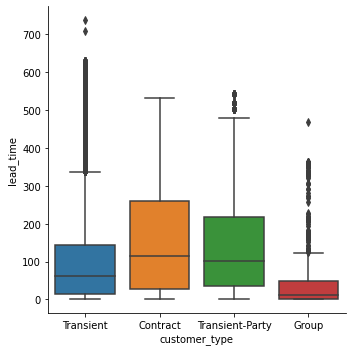

In [72]:
from matplotlib.pyplot import box
sns.catplot(data=pddf,y='lead_time',x='customer_type',kind='box')

solution 18)*******

In [73]:
df19 = new14_2df.toPandas()

In [88]:
new14_2df.printSchema()

root
 |-- yearmonth: string (nullable = true)
 |-- hotel: string (nullable = true)
 |-- count: long (nullable = false)



In [117]:
import matplotlib.pyplot as plt
import numpy as np

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

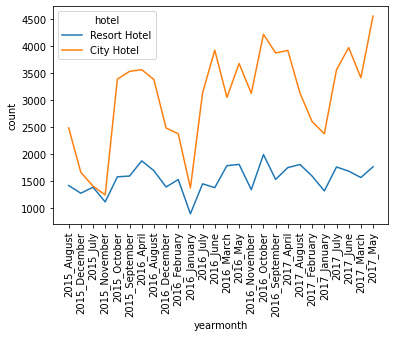

In [120]:
sns.lineplot(data=df19,x='yearmonth',y='count',hue='hotel')
plt.xticks(rotation = 'vertical')

solution 19)*******

In [94]:
df20 = new13_1df.toPandas()

In [95]:
df20

,arrival_date,sum(people)
0,2017_May_9,159.0
1,2017_May_8,151.0
2,2017_May_7,99.0
3,2017_May_6,212.0
4,2017_May_5,253.0
...,...,...
788,2015_August_13,105.0
789,2015_August_12,98.0
790,2015_August_11,56.0
791,2015_August_10,160.0


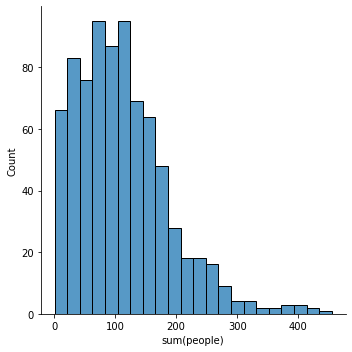

In [99]:
sns.displot(data=df20,x='sum(people)', kind='hist')

solution 20)******